---

#  $k$-Means Clustering

![alt](https://i.stack.imgur.com/ibYKU.png)

Unlike supervised learning, unsupervised learning deals with *unlabeled* data. As such, the techniques used are vastly different than those found in supervised learning. Unsupervised learning typically falls within the following two reahlms:

1. **Clustering**

2. **Dimensionality Reduction**


---

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set_theme()

from sklearn.datasets import make_checkerboard
X, y = make_checkerboard(n_samples = 100, random_state = 0)

In [45]:
def colors(y):
    if y == 0:
        return "blue"
    elif y == 1:
        return "lightseagreen"
    elif y == 2:
        return "magenta"
    else:
        return "purple"

c = [colors(label) for label in y]

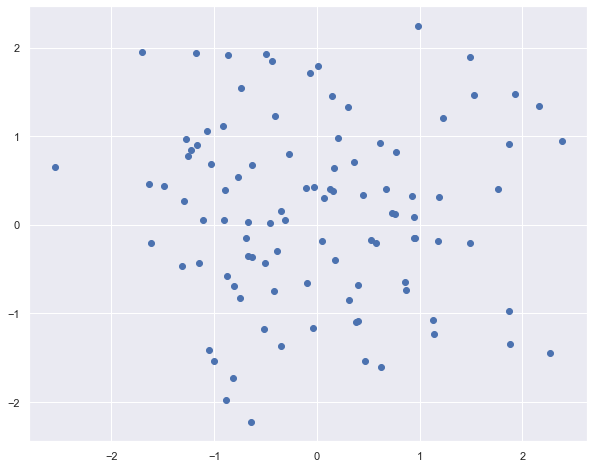

In [46]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [47]:

centers = []
for k in range(3):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

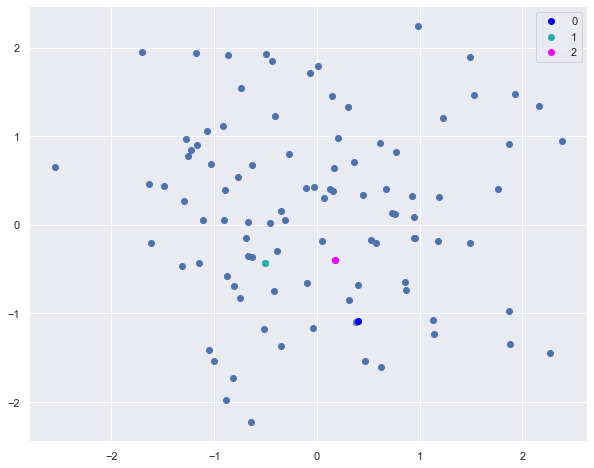

In [48]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "blue", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
plt.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])
plt.legend()
plt.show()

In [49]:
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

In [50]:
def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

In [51]:
def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]


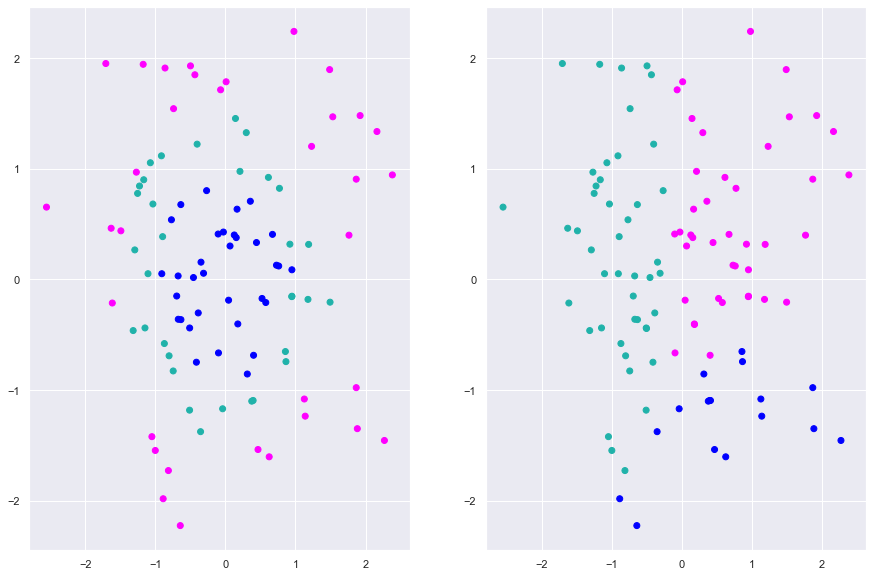

In [52]:
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "blue", label = centers[0][2])
ax2.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
ax2.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])

plt.show()

In [53]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]
        



In [54]:
new_centers = update_centers(X, centers)

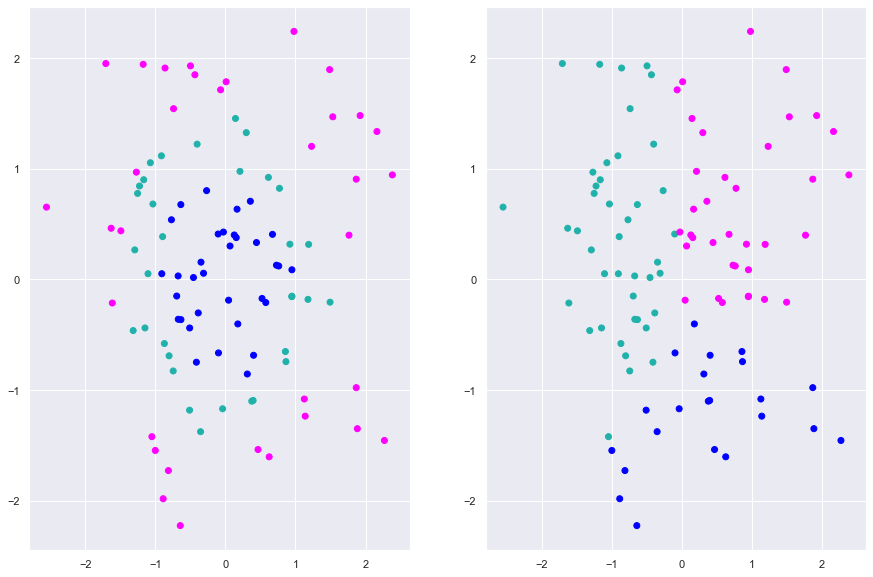

In [55]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)


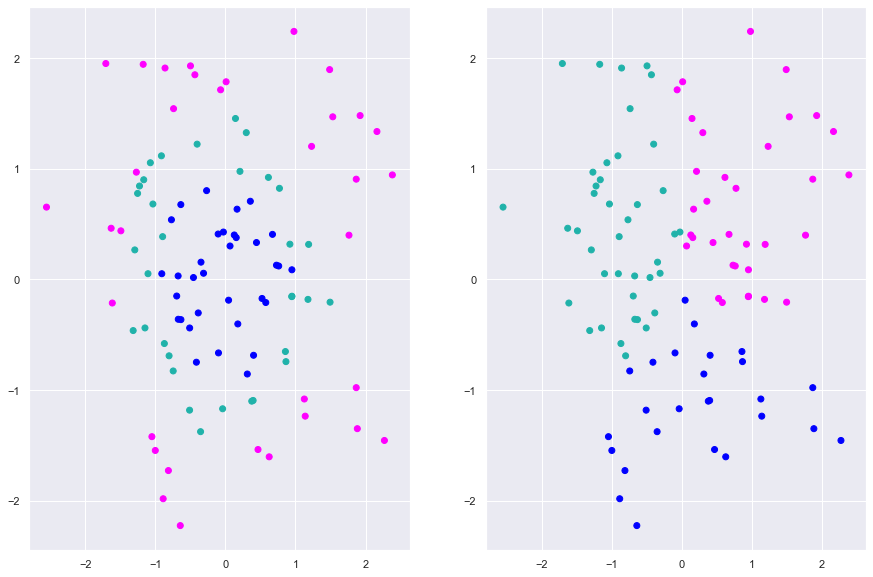

In [56]:
new_centers = update_centers(X, new_centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

In [57]:
def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers
    

In [58]:
centers = k_means_clustering(X, 2)

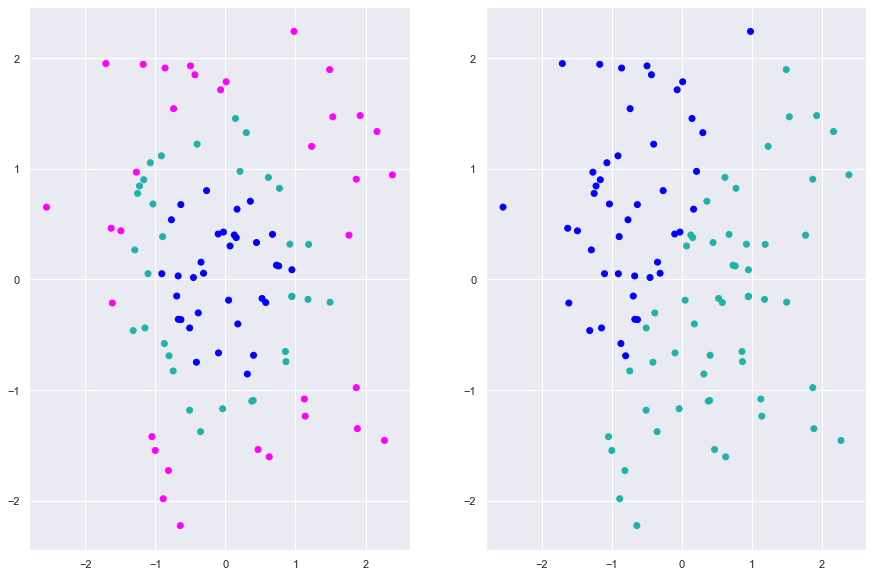

In [59]:
centers = k_means_clustering(X, 2)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()